In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import HuberRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.linear_model import OrthogonalMatchingPursuit
from sklearn.metrics import r2_score
import plotly.express as px
%pip install pycaret
from pycaret.regression import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
%ls
file_path = 'coffee_reviews_cleaned.json'
data = pd.read_json(file_path)
print(data)

coffee_reviews_cleaned.json  logs.log  sample_data/
                                            title  rating  aftertaste  aroma  \
0                         Bolivia Manantial Gesha      93           8      9   
1     Yellow Pacamara Carbonic Maceration Nanolot      92           8      9   
2                      Ethiopia Gera Genji Challa      94           8      9   
3                    Yirgacheffe Mengesha Natural      94           8      9   
4              Tropical Summer Colombia La Sierra      93           8      9   
...                                           ...     ...         ...    ...   
4886                     Ethiopia Kemgin Espresso      92           8      9   
4887                           Kenya AA Gandurine      93           8      9   
4888                        Honduras David Mancia      94           9      9   
4889                                 Doug E Fresh      90           8      9   
4890                             Tangletown Blend      89           

#Task 1

In [11]:
data['coffee_origin'] = data['coffee_origin'].str.split(',').str[-1].str.strip()
data['roaster_location'] = data['roaster_location'].str.split(',').str[-1].str.strip()

top_5_locations = data['coffee_origin'].value_counts().nlargest(5).index.tolist()
data.loc[~data['coffee_origin'].isin(top_5_locations), 'coffee_origin'] = 'Other'

top_5_locations = data['roaster_location'].value_counts().nlargest(5).index.tolist()
data.loc[~data['roaster_location'].isin(top_5_locations), 'roaster_location'] = 'Other'

print(data)

                                            title  rating  aftertaste  aroma  \
0                         Bolivia Manantial Gesha      93           8      9   
1     Yellow Pacamara Carbonic Maceration Nanolot      92           8      9   
2                      Ethiopia Gera Genji Challa      94           8      9   
3                    Yirgacheffe Mengesha Natural      94           8      9   
4              Tropical Summer Colombia La Sierra      93           8      9   
...                                           ...     ...         ...    ...   
4886                     Ethiopia Kemgin Espresso      92           8      9   
4887                           Kenya AA Gandurine      93           8      9   
4888                        Honduras David Mancia      94           9      9   
4889                                 Doug E Fresh      90           8      9   
4890                             Tangletown Blend      89           8      8   

      body  flavor  with_milk    agtron

#Task 3



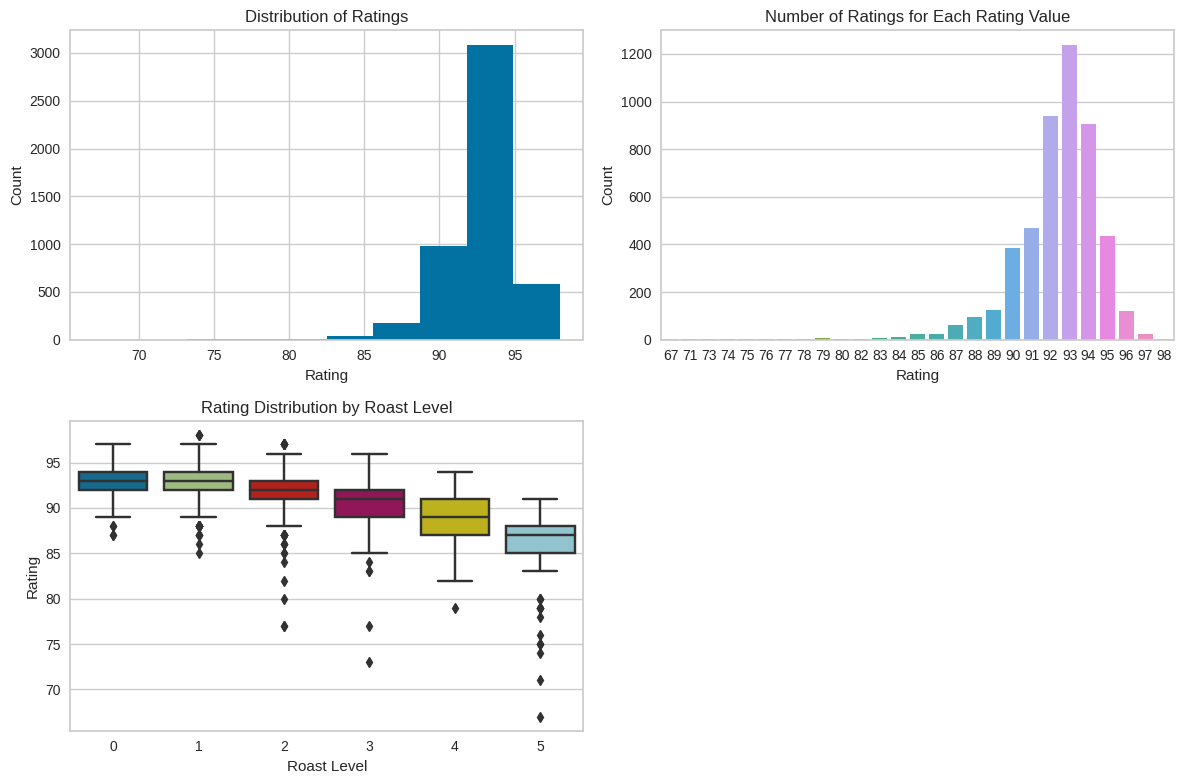

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

axes[0, 0].hist(data['rating'], bins=10)
axes[0, 0].set_xlabel('Rating')
axes[0, 0].set_ylabel('Count')
axes[0, 0].set_title('Distribution of Ratings')

rating_counts = data['rating'].value_counts().sort_index()
sns.barplot(x=rating_counts.index, y=rating_counts.values, ax=axes[0, 1])
axes[0, 1].set_xlabel('Rating')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('Number of Ratings for Each Rating Value')

scatter_plot = px.scatter(data, x='aroma', y='aftertaste', color='rating', hover_data=['title'])
scatter_plot.update_layout(showlegend=False)
scatter_plot.show()

sns.boxplot(x='roast_level', y='rating', data=data, ax=axes[1, 0])
axes[1, 0].set_xlabel('Roast Level')
axes[1, 0].set_ylabel('Rating')
axes[1, 0].set_title('Rating Distribution by Roast Level')


fig.delaxes(axes[1, 1])

fig.tight_layout()

plt.show()


#Task 2 & 4

In [12]:
data.drop(columns=['notes', 'title', 'blind_assessment', 'bottom_line', 'roaster'], inplace=True)
print(data)

le = LabelEncoder()

list = ['coffee_origin', 'roaster_location', 'review_date']

for i in list:
    data[i] = le.fit_transform(data[i])

print(data)

#numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
#scaler = StandardScaler()
#data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

X = data.drop(['rating'], axis=1)
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#------------------------

reg_setup = setup(data=data, target='rating')

best_models = compare_models(n_select=5, fold=5, sort='R2')

ensemble_model = blend_models(estimator_list=best_models, fold=5, optimize='R2')

ensemble_predictions = ensemble_model.predict(X_test)

individual_scores = []
for model in best_models:
    individual_scores.append(model.score(X_test, y_test))

ensemble_score = ensemble_model.score(X_test, y_test)

print("R^2 scores for individual models:")
for i in range(len(best_models)):
    print(f"Model {i+1}: {individual_scores[i]}")
print(f"Ensemble Model: {ensemble_score}")

      rating  aftertaste  aroma  body  flavor  with_milk    agtron  \
0         93           8      9     8       9          0  0.769231   
1         92           8      9     8       9          0  0.769231   
2         94           8      9     9       9          0  0.766234   
3         94           8      9     9       9          0  0.779221   
4         93           8      9     8       9          0  0.779221   
...      ...         ...    ...   ...     ...        ...       ...   
4886      92           8      9     7       9          1  0.800000   
4887      93           8      9     8       9          0  0.750000   
4888      94           9      9     8       9          0  0.780822   
4889      90           8      9     7       8          0  0.810811   
4890      89           8      8     7       8          0  0.732558   

          coffee_origin  est_price    review_date  roast_level  \
0                 Other   1.296875   January 2023            1   
1                 Other   6

,Description,Value
0,Session id,1901
1,Target,rating
2,Target type,Regression
3,Original data shape,"(4891, 12)"
4,Transformed data shape,"(4891, 12)"
5,Transformed train set shape,"(3423, 12)"
6,Transformed test set shape,"(1468, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.4462,0.2803,0.5293,0.9411,0.0058,0.0048,0.0680
ridge,Ridge Regression,0.4463,0.2803,0.5293,0.9411,0.0058,0.0048,0.0580
lar,Least Angle Regression,0.4460,0.2804,0.5294,0.9411,0.0059,0.0048,0.0580
br,Bayesian Ridge,0.4462,0.2803,0.5293,0.9411,0.0058,0.0048,0.0600
gbr,Gradient Boosting Regressor,0.4473,0.3018,0.5488,0.9371,0.0062,0.0049,0.4260
xgboost,Extreme Gradient Boosting,0.4618,0.3556,0.5956,0.9258,0.0067,0.0050,0.5140
rf,Random Forest Regressor,0.4564,0.3564,0.5964,0.9255,0.0067,0.0050,1.5120
et,Extra Trees Regressor,0.4509,0.3601,0.5995,0.9249,0.0067,0.0049,0.7300
lightgbm,Light Gradient Boosting Machine,0.4666,0.4202,0.6443,0.9134,0.0074,0.0051,0.3540
ada,AdaBoost Regressor,0.6301,0.6071,0.7778,0.8734,0.0085,0.0068,0.3280


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.4467,0.2837,0.5326,0.9388,0.0059,0.0048
1,0.4530,0.2837,0.5326,0.9350,0.0059,0.0049
2,0.4470,0.2859,0.5347,0.9396,0.0059,0.0048
3,0.4340,0.2584,0.5083,0.9452,0.0057,0.0047
4,0.4379,0.2722,0.5217,0.9510,0.0058,0.0048
Mean,0.4437,0.2768,0.5260,0.9419,0.0058,0.0048
Std,0.0068,0.0104,0.0099,0.0056,0.0001,0.0001


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

R^2 scores for individual models:
Model 1: 0.94683281690923
Model 2: 0.9468163374956036
Model 3: 0.9468328169092299
Model 4: 0.946824049275614
Model 5: 0.9491808738160554
Ensemble Model: 0.9483168136039257


#Task 5

In [13]:
X = data.drop(['est_price'], axis=1)
y = data['est_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#------------------------

reg_setup = setup(data=data, target='est_price')

best_models = compare_models(n_select=5, fold=5, sort='R2')

ensemble_model = blend_models(estimator_list=best_models, fold=5, optimize='R2')

ensemble_predictions = ensemble_model.predict(X_test)

individual_scores = []
for model in best_models:
    individual_scores.append(model.score(X_test, y_test))

ensemble_score = ensemble_model.score(X_test, y_test)

print("R^2 scores for individual models:")
for i in range(len(best_models)):
    print(f"Model {i+1}: {individual_scores[i]}")
print(f"Ensemble Model: {ensemble_score}")

,Description,Value
0,Session id,839
1,Target,est_price
2,Target type,Regression
3,Original data shape,"(4891, 12)"
4,Transformed data shape,"(4891, 12)"
5,Transformed train set shape,"(3423, 12)"
6,Transformed test set shape,"(1468, 12)"
7,Numeric features,11
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,0.6082,60.8804,4.6468,-0.0083,0.3438,14.3923,0.1460
dummy,Dummy Regressor,0.8338,60.7412,4.6446,-0.0125,0.3835,22.2633,0.0660
br,Bayesian Ridge,0.8320,60.9108,4.6502,-0.0155,0.3838,21.7554,0.0700
lasso,Lasso Regression,0.8347,60.7385,4.6488,-0.0223,0.3870,22.5055,0.0680
llar,Lasso Least Angle Regression,0.8347,60.7385,4.6488,-0.0223,0.3870,22.5055,0.0680
en,Elastic Net,0.8312,60.7821,4.6509,-0.0239,0.3856,22.7546,0.0700
omp,Orthogonal Matching Pursuit,0.8354,60.7382,4.6504,-0.0253,0.3882,22.5224,0.0680
ada,AdaBoost Regressor,1.0133,60.8153,4.6637,-0.0618,0.4309,30.2627,0.2660
par,Passive Aggressive Regressor,0.8147,61.1996,4.7219,-0.1059,0.4399,10.0412,0.0640
ridge,Ridge Regression,0.8980,61.6463,4.8135,-0.2146,0.4171,21.1724,0.0740


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6681,1.9501,1.3965,0.0036,0.3660,22.8031
1,0.7388,4.3501,2.0857,0.0098,0.3856,18.1082
2,0.6253,2.3815,1.5432,0.0076,0.3405,11.5969
3,0.6165,0.9995,0.9998,-0.0041,0.3439,23.5642
4,1.1979,294.0993,17.1493,-0.0022,0.3882,27.2251
Mean,0.7693,60.7561,4.6349,0.0030,0.3648,20.6595
Std,0.2186,116.6767,6.2669,0.0054,0.0200,5.3810


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

R^2 scores for individual models:
Model 1: -0.0014199934667049607
Model 2: -0.004052536815811747
Model 3: -0.003665913423384737
Model 4: -0.006157650915983748
Model 5: -0.006157650915983748
Ensemble Model: 0.00737363188455864


In [16]:
X = data.drop(['est_price'], axis=1)
y = data['est_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

huber = HuberRegressor(epsilon=1.35)
huber.fit(X_train, y_train)

huber_predictions = huber.predict(X_test)

accuracy = r2_score(y_test, huber_predictions)

print("Accuracy:", accuracy)

Accuracy: -0.003283509970834597
